In [11]:
from sklearn.metrics import roc_curve, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#1)데이터를 로드 하자
df = sns.load_dataset('titanic')

#2)5줄의 내용을 확인 하자
df.head()

#3) 결손값 유무 확인
df.isnull().sum()

#4) deck 변수결손치열, alive를 제외하자.
drop_list = ["deck", "alive"]
df = df.drop(drop_list, axis = 1)

#5) 결손치가 있는 행을 삭제해서 표시
df = df.dropna()

#6) 데이터 분할 survived(대상), 특징이 되는 데이터(Feature Selection) : X  survived(대상) Y
X = df.drop("survived", axis=1)
Y = df["survived"]

#7) X 데이터의 더미화 확인
X = pd.get_dummies(X)
X.head()
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [13]:
#2단계 분류학습 시작
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.5, random_state = 0)

#데이터 크기 확인
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(356, 21)
(356, 21)
(356,)
(356,)


In [14]:
# 3단계 로지스틱 회귀 모델의 인스턴스를 만들고 훈련데이터로 학습을 시키자
# 1000번 반복해서 학습   sklearn.liner_model.LogisticRegression
from sklearn.linear_model import LogisticRegression
ir = LogisticRegression(max_iter=1000, random_state = 0) # 1000번을 반복해서 판정을 한다.
ir.fit(X_train,Y_train)  # 학습을 한다

#4단계 학습 데이터 판정 결과(예측)를 test 데이터로 확인 하자
y_pred = ir.predict(X_test)
print(y_pred)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0
 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0]


In [18]:
#5단계 지표를 산출하자.  : 4단계에서 구현한 예측치 y_pred와 test 데이터의 실제 값을 사용해서 평가 지표를 구할 수 있다.
from sklearn.metrics import *
print('confusion_matrix = ',confusion_matrix(Y_test,y_pred))
print('accuracy = ', accuracy_score(Y_test,y_pred))
print('precision = ', precision_score(Y_test,y_pred))
print('recall = ',recall_score(Y_test,y_pred))
print('f1 score = ',f1_score(Y_test,y_pred))

confusion_matrix =  [[179  31]
 [ 40 106]]
accuracy =  0.800561797752809
precision =  0.7737226277372263
recall =  0.726027397260274
f1 score =  0.7491166077738517


In [19]:
# 번외 1) Log loss 기법 : 확률을 입력으로 분류하는 기법의 성능평가
# 로지스틱 회귀모델에서 대상을 0과 1로 분류되는 확률을 각각 출력하고 싶을 경우 predict_proba()

# 먼저 모델에서 Y가 0인 확률을 예측해서 확인
probs = ir.predict_proba(X_test)
print(probs[:5])

[[0.48061197 0.51938803]
 [0.80028107 0.19971893]
 [0.02380526 0.97619474]
 [0.85349269 0.14650731]
 [0.94115893 0.05884107]]


ROC 곡선과 PR 곡선은 데이터가 Positive일 확률 모델에서 예측해서 Positive일 경우가 높다고 예측하고 순서대로 정렬
예측한 확률에서 Positive일 경우의 판정기준(임계값)을 기점으로 FPR, TPR이 어떻게 변화하는지를 확인
적합율(Precision)와 재현율(Recall, TPR)의 변화를 나타낸것이 PR 곡선

In [23]:
#번외 2) ROC 곡선, PR 곡선, 각각의 AUC 산출
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# 테스트 데이터가 클래스 1에 속하는 확률을 예측하고 그 확률에서 FPR, TPR, 임계값을 계산해 보자.

Y_score = ir.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)

#값을 편안하게 테이블로 확인 하자.
df = pd.DataFrame([fpr, tpr, thresholds])
df.T

,0,1,2
0,0.000000,0.000000,1.994756
1,0.000000,0.006849,0.994756
2,0.000000,0.027397,0.983053
3,0.004762,0.027397,0.982462
4,0.004762,0.136986,0.956457
...,...,...,...
100,0.871429,0.986301,0.062995
101,0.871429,0.993151,0.062939
102,0.914286,0.993151,0.054308
103,0.914286,1.000000,0.054110


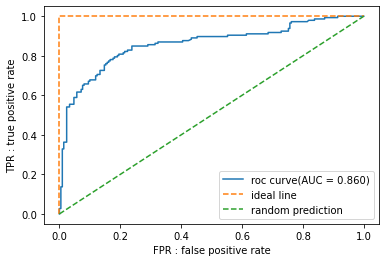

In [24]:
# 번외 3) plot 해보자
plt.plot(fpr,tpr,label = 'roc curve(AUC = %.3f)'% auc(fpr,tpr))
plt.plot([0,0,1],[0,1,1], linestyle = '--', label = 'ideal line')
plt.plot([0,1],[0,1], linestyle = '--', label = 'random prediction')
plt.legend()
plt.xlabel('FPR : false positive rate')
plt.ylabel('TPR : true positive rate')
plt.show()

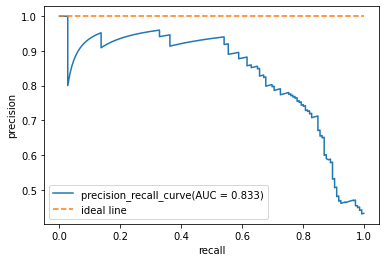

In [25]:
#번외 4)  PR 곡선
probas_pred = ir.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(Y_test, probas_pred)
 
plt.plot(recall,precision,label = 'precision_recall_curve(AUC = %.3f)'% auc(recall,precision))
plt.plot([0,1],[1,1], linestyle = '--', label = 'ideal line')
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()